In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print("Train set dimension: ", x_train.shape, y_train.shape)


Train set dimension:  (60000, 28, 28) (60000,)


In [7]:
print("Test set dimension: ", x_test.shape, y_test.shape)

Test set dimension:  (10000, 28, 28) (10000,)


In [8]:
num_labels = len(np.unique(y_train))

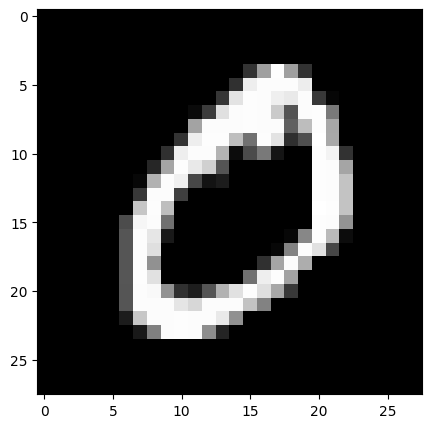

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1], cmap='gray')
plt.show()

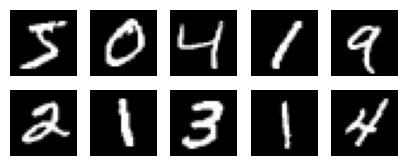

In [11]:
plt.figure(figsize=(5,5))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap='gray')
  #plt.title(y_train[n])
  plt.axis('off')

In [12]:
def visualize_img(data, datasize: int):
  plt.figure(figsize=(5,5))
  for n in range(datasize):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap='gray')
    #plt.title(y_train[n])
    plt.axis('off')

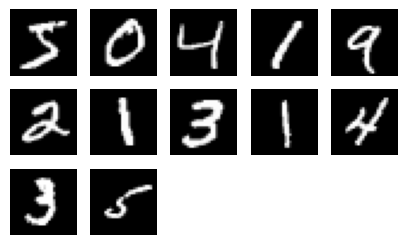

In [13]:
visualize_img(x_train, datasize=12)